# Sentimental Analysis for Tweets .



# IMPORTING NECESSARY LIBRARIES

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import nltk
import string
from nltk.tokenize import word_tokenize

In [47]:
dataset = pd.read_csv("sentiment_tweets3.csv")

In [48]:
dataset

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [49]:
dataset= dataset.rename(columns = {"message to examine":"text", "label (depression result)" :"Category" })
dataset

,Index,text,Category
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


# Data Preprocessing

In [50]:
dataset = dataset[["text", "Category"]]
dataset

,text,Category
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


In [51]:
dataset.shape
print("the number of row : ",dataset.shape[0])
print("the number of column : ",dataset.shape[1])

the number of row :  10314
the number of column :  2


In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [53]:
dataset.isnull().sum()

text        0
Category    0
dtype: int64

In [55]:
dataset.duplicated().sum()
print("the number of duplicated values: ",dataset.duplicated().sum())

the number of duplicated values:  31


In [56]:
dataset = dataset.drop_duplicates()

In [57]:
# THE SHAPE AFTER REMOVING DUPLICATE VALUES
dataset.shape
print("the number of row after removing  duplicated values  : ",dataset.shape[0])
print("the number of column : ",dataset.shape[1])

the number of row after removing  duplicated values  :  10283
the number of column :  2


In [58]:
dataset["Category"].unique()

array([0, 1], dtype=int64)

In [59]:
dataset['Category'] = dataset['Category'].replace(0,'Not Depressed')
dataset['Category'] = dataset['Category'].replace(1,'Depressed')

C:\Users\user\AppData\Local\Temp\ipykernel_18876\877619481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Category'] = dataset['Category'].replace(0,'Not Depressed')
C:\Users\user\AppData\Local\Temp\ipykernel_18876\877619481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Category'] = dataset['Category'].replace(1,'Depressed')


In [60]:
dataset

,text,Category
0,just had a real good moment. i missssssssss hi...,Not Depressed
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed
...,...,...
10309,No Depression by G Herbo is my mood from now o...,Depressed
10310,What do you do when depression succumbs the br...,Depressed
10311,Ketamine Nasal Spray Shows Promise Against Dep...,Depressed
10312,dont mistake a bad day with depression! everyo...,Depressed


In [61]:
dataset["Category"].value_counts()

Category
Not Depressed    7996
Depressed        2287
Name: count, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

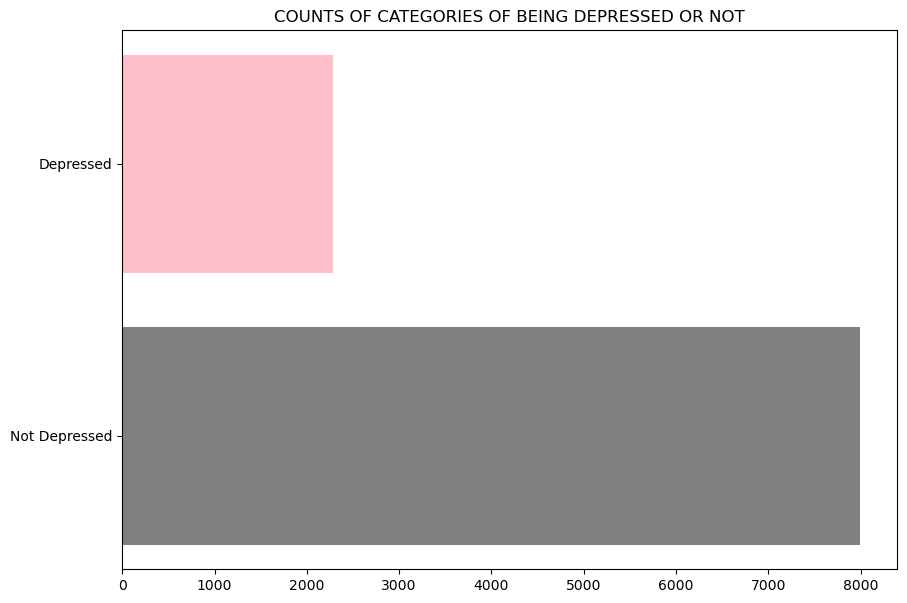

In [64]:
fig = plt.figure(figsize =(10, 7))
plt.barh(dataset["Category"].unique(), dataset["Category"].value_counts(), 
         color =['', 'pink'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

In [65]:
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from collections import Counter


# Process the text 


In [67]:
dataset['text']

0        just had a real good moment. i missssssssss hi...
1               is reading manga  http://plurk.com/p/mzp1e
2        @comeagainjen http://twitpic.com/2y2lx - http:...
3        @lapcat Need to send 'em to my accountant tomo...
4            ADD ME ON MYSPACE!!!  myspace.com/LookThunder
                               ...                        
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
10312    dont mistake a bad day with depression! everyo...
10313                                                    0
Name: text, Length: 10283, dtype: object

In [69]:
dataset['text_cleaned']=dataset[' '].str.lower()
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\1464634951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned']=dataset['text'].str.lower()


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,just had a real good moment. i missssssssss hi...
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,is reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,@lapcat need to send 'em to my accountant tomo...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add me on myspace!!! myspace.com/lookthunder


1-romoving stop words

In [70]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(words)

dataset['text_cleaned'] = dataset['text_cleaned'].apply(remove_stopwords)
dataset.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\user\AppData\Local\Temp\ipykernel_18876\2822569565.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(remove_stopwords)


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga http://plurk.com/p/mzp1e
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,@comeagainjen http://twitpic.com/2y2lx - http:...
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,@lapcat need send 'em accountant tomorrow. odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace!!! myspace.com/lookthunder


2-Cleaning URLs

In [71]:
def clean_url(data):
    data=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',data)
    return re.sub(r'/', ' / ', data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_url(x))
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\2711195390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_url(x))


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,"real good moment. missssssssss much,"
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,@comeagainjen -
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,@lapcat need send 'em accountant tomorrow. odd...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace!!!


3 - Cleaning Punctuations

In [73]:
import string
def clean_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_punctuations(x))
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\3175863017.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_punctuations(x))


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment missssssssss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


4 - repeating_char

In [75]:
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_repeating_char(x))
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\3848673915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_repeating_char(x))


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


5 - Cleaning Numbers

In [76]:
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_numbers(x))
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\1491911084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_numbers(x))


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


6 - remove hashtag


In [77]:
def remove_hashtag(data):
    return re.sub('#[\w\d]+',' ' ,data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_hashtag(x))
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\3355377785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: remove_hashtag(x))


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


7 - clean username

In [79]:
def clean_username(data):
    return re.sub('@[^\s]+',' ', data)
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_username(x))
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\51800986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_username(x))


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


8 - clean emoji

In [80]:
def clean_emoji(data):    
    data = re.sub(r'<3', '<heart>', data)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', data)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', data)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', data)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', data)
    return data
dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_emoji(x))
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\1546822378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(lambda x: clean_emoji(x))


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace


9 - remove images

In [81]:
def remove_images(tweet):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', tweet)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", cleaned_tweet)
    return cleaned_tweet

dataset['text_cleaned'] = dataset['text_cleaned'].apply(remove_images)
dataset.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_18876\1438001254.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text_cleaned'] = dataset['text_cleaned'].apply(remove_images)


,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace
5,so sleepy. good times tonight though,Not Depressed,sleepy good times tonight though
6,"@SilkCharm re: #nbn as someone already said, d...",Not Depressed,silkcharm re nbn someone already said fiber ho...
7,23 or 24ï¿½C possible today. Nice,Not Depressed,ï¿½c possible today nice
8,nite twitterville workout in the am -ciao,Not Depressed,nite twitterville workout ciao
9,"@daNanner Night, darlin'! Sweet dreams to you",Not Depressed,dananner night darlin sweet dreams


In [85]:
dataset.sample(10)

,text,Category,text_cleaned
3646,@kime13 Thank you so much... Lovely to catch up!,Not Depressed,kime thank much lovely catch up
4099,YAY for bonfires!!!!,Not Depressed,yay bonfires
6580,Thanks everyone for suggestions r.e. http://el...,Not Depressed,thanks everyone suggestions keep asis time am...
3043,Just looked Katty Perry's sushi nail. It's fun...,Not Depressed,looked katty perrys sushi nail funny
6223,@glsmeltr and thank you so much for your hospi...,Not Depressed,glsmeltr thank much hospitality appreciate it
3873,"Hanging out with Whitney, drinking margaritas,...",Not Depressed,hanging whitney drinking margaritas getting re...
7505,I'm so excited now these next two weeks...,Not Depressed,im excited next two weeks
4791,"@octavianis bear with me, im coming back soon...",Not Depressed,octavianis bear me im coming back soon
8167,"2day was terrible but napped, showered, and no...",Depressed,day terrible napped showered im drinking coffe...
4688,"@coachkiki otherwise, if you watched any of ab...",Not Depressed,coachkiki otherwise watched abcs homeland secu...


In [87]:
dataset

,text,Category,text_cleaned
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace
...,...,...,...
10309,No Depression by G Herbo is my mood from now o...,Depressed,depression g herbo mood on im done stressing p...
10310,What do you do when depression succumbs the br...,Depressed,depression succumbs brain makes feel like neve...
10311,Ketamine Nasal Spray Shows Promise Against Dep...,Depressed,ketamine nasal spray shows promise depression ...
10312,dont mistake a bad day with depression! everyo...,Depressed,dont mistake bad day depression everyone em


10 - lemmatizer

In [92]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


lemmatizer = WordNetLemmatizer()

In [101]:
nltk.download('punkt')
nltk.download('wordnet', '/root/nltk_data/')
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [100]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [104]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

dataset['lemmatizedRows'] = dataset['text_cleaned'].apply(lemmatizeRows)
 dataset['lemmatizedRows']= dataset['text_celeaned']
dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\3315847361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['lemmatizedRows'] = dataset['text_cleaned'].apply(lemmatizeRows)


,text,Category,text_cleaned,lemmatizedRows
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,read manga,read manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...,lapcat need send em accountant tomorrow oddly ...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace,add myspace


11 - Stemming

In [105]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

dataset['stemmedRows'] = dataset['lemmatizedRows'].apply(stemRows)

dataset.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18876\555767597.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['stemmedRows'] = dataset['lemmatizedRows'].apply(stemRows)


,text,Category,text_cleaned,lemmatizedRows,stemmedRows
0,just had a real good moment. i missssssssss hi...,Not Depressed,real good moment miss much,real good moment miss much,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,Not Depressed,read manga,read manga,read manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,Not Depressed,comeagainjen,comeagainjen,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,Not Depressed,lapcat need send em accountant tomorrow oddly ...,lapcat need send em accountant tomorrow oddly ...,lapcat need send em account tomorrow oddli eve...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,Not Depressed,add myspace,add myspace,add myspac


In [109]:
dataset.isnull().sum()

text              0
Category          0
text_cleaned      0
lemmatizedRows    0
stemmedRows       0
dtype: int64

# Build a Naive Bayes mode

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dataset = pd.read_csv(r'C:\Users\USER\Desktop\Python\jupyter\sentiment_tweets3.csv')

X = dataset['message to examine']
y = dataset['label (depression result)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Build a Naive Bayes model (Multinomial Naive Bayes)
naive_bayes_model = MultinomialNB()

# Train the model
naive_bayes_model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 97.67%
Confusion Matrix:
 [[1582   32]
 [  16  433]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1614
           1       0.93      0.96      0.95       449

    accuracy                           0.98      2063
   macro avg       0.96      0.97      0.97      2063
weighted avg       0.98      0.98      0.98      2063

